# Principal Component Analysis (PCA) – Grundlagen und Anwendungen

![](repository-address.png)

Codebase: https://github.com/caxenie/pca-intro-demo

jupyter nbconvert PCAIntroDemo.ipynb --to slides --post serve


![](setup.png)

![](setup-sensors.png)

![](setup-sensors-data.png)

![](setup-sensors-data-kinematic-chain.png)

## Grundlegende Mathematik der PCA

### Lineare Transformation

Es sei $\{x_i\}^N_{i=1}$ eine Menge von $N$ Beobachtungs-Vektoren der Dimension $n$ mit $n\leq N$.

Eine __lineare Transformation__ eines __endlich-dimensionalen__ Vektors kann als __Matrix Multiplikation__ ausgedrückt werden: 

$$ \begin{align} y_i = W x_i \end{align} $$  
  
mit $x_i \in R^{n}, y_i \in R^{m}$ und $W \in R^{nxm}$. 

### Lineare Transformation

* Das $j-te$ Element in $y_i$ ist das __Innere Produkt__ von $x_i$ und der $j-ten$ Spalte der Matrix $W$, welche wir durch $w_j$ bezeichen. Es sei $X \in R^{nxN}$ die Matrix, welche wir durch horizontale Aneinanderreihung der Vektoren $\{x_i\}^N_{i=1}$ erhalten, 

$$ X = \begin{bmatrix} | ... | \\ x_1 ... x_N \\ | ... | \end{bmatrix} $$

* Aus der __linearen Transformation__ folgt:

$$ Y = W^TX,  Y_0 = W^TX_0, $$

wobei $X_0$ die __Matrix der zentrierten Elemente__ (d.h. wir subtrahieren den Mittelwert von jeder Beobachtung) bezeichnet, und __Kovarianzmatrix__ $X_0X_0^T$.

### Dimensionsreduzierung, Komprimierung

PCA wird zur __Dimensions-Reduktion__ verwendet, da sie durch die durch eine lineare Transformation die __Anzahl der Variablen reduziert__. 

Da nur die ersten __$m$ Hauptkomponenten erhalten__ werden, __verliert__ PCA __information__ (d.h. __verlustreiche Komprimierung__). 

Der __Verlust__ (_Summe des quadratischen Rekonstruktions-Fehlers_ ) wird jedoch durch die __Maximierung der Komponenten-Varianzen minimiert__

$$ \min_{W \in R^{nxm}} \| X_0 - WW^TX_0 \|_F^2, W^TW = I_{mxm}$$

wobei $F$ die Frobenius-Norm bezeichnet. 

![](setup-sensors-data-kinematic-chain.png)

# PCA 

![](svd-graphic-simple.png)
* Wird zur __Dimensions-Reduzierung__ genutzt (Komprimierung)
* Die __Rekonstruktion der Beobachtungen__("decoding") aus den führenden __Hauptkomponenten__ hat den __niedrigsten quadratischen Fehler__

## Grundlegende PCA

Jetzt werden wir PCA implementieren. Bevor wir das tun, sollten wir einen Moment innehalten und
über die Schritte zur Durchführung der PCA nachdenken. Angenommen, wir führen eine PCA für
einem Datensatz $\boldsymbol X$ für $M$ Hauptkomponenten durchführen.
Dann müssen wir die folgenden Schritte durchführen, die wir in Teile unterteilen:


1. die Normalisierung und Standardisierung der Daten(` normalisieren`)
2. die Eigenwerte und die entsprechenden Eigenvektoren für die Kovarianzmatrix $S$ finden.
Sortieren Sie nach den größten Eigenwerten und den zugehörigen Eigenvektoren(`eig`)
3. Anschließend können wir die Projektion und Rekonstruktion der Daten auf den von den obersten $n$-Eigenvektoren aufgespannten Raum berechnen.

In [ ]:
def normalize(X):
    """Normalisierung des gegebenen Datensatzes X
        
    Args:
        X: ndarray, Datensatz
    
    Returns:
        (Xbar, mean, std): Tupel von ndarray, Xbar ist der normalisierte Datensatz
        mit Mittelwert 0 und Standardabweichung 1; mean und std sind der
        Mittelwert bzw. die Standardabweichung.
    
    Note:
        Sie werden auf Dimensionen stoßen, bei denen die Standardabweichung
        Null ist, für die bei einer Normalisierung die normalisierten Daten
        NaN sein. Behandeln Sie dies, indem Sie `std = 1` für diese
        Dimensionen bei der Normalisierung.
    """

    # CODE hier

In [ ]:
def eig(S):
    """Berechnen Sie die Eigenwerte und die entsprechenden Eigenvektoren für 
        die Kovarianzmatrix S.
        
    Args:
        S: nDarray, Kovarianzmatrix
    
    Returns:
        (eigvals, eigvecs): ndarray, die Eigenwerte und Eigenvektoren

    Note:
        Die Eigenwerte und Eigenvektoren sollten in absteigender
        Reihenfolge der Eigenwerte
    """
    # CODE hier

In [ ]:
def projection_matrix(B):
    """Berechnen Sie die Projektionsmatrix auf den von "B" aufgespannten Raum
    
    Args:
        B: nDarray der Dimension (D, M), die Basis für den Unterraum
    
    Returns:
        P: die Projektionsmatrix
    """
    return pass     # CODE hier

In [ ]:
def PCA(X, num_components):
    """
    Args:
        X: nDarray der Größe (N, D), wobei D die Dimension der Daten ist,
            und N die Anzahl der Datenpunkte ist
       num_components: die Anzahl der zu verwendenden Hauptkomponenten.
    Returns:
        X_reconstruct: ndarray der Rekonstruktion
        von X aus den ersten `num_components` Hauptkomponenten.
    """
    # zunächst werden die Ziffern normalisiert, so dass sie einen Mittelwert 
    # von Null und eine Einheitsvarianz haben.
    
    # berechnen Sie dann die Kovarianzmatrix S der Daten

    # CODE hier
    
    # als nächstes werden die Eigenwerte und die entsprechenden Eigenvektoren für S
    
    # CODE hier
    
    # Indizes für die größten Eigenwerte zu finden, sie zum Sortieren der Eigenwerte 
    # zu verwenden und entsprechende Eigenvektoren.

    # CODE hier
    
    # Dimensionalitätsreduktion der Originaldaten
    
    # CODE hier
    
    # die Bilder aus der niederdimensionalen Darstellung rekonstruieren
    
    # CODE hier
    
    return reconst.T

### Skalierung

Zur Berechung der PCA können viele verschiedene __iterative Algorithmen__ eingesetzt werden 
* QR Algorithmen
* Jacobi Algorithmus
* Power methode
* __Singulärwert-Zerlegung (Singular Value Decomposition, SVD)__

Für __sehr große Datenmengen__ eignen sich diese Algorithmen __nicht__!

### Singulärwert-Zerlegung 
### (Singular Value Decomposition, SVD)

Ein Vektor $v$ der Dimension $N$ ist ein __Eigenvektor__ einer quadratischen N × N Matrix $A$, wenn diese die folgende __lineare Gleichung__ erfüllt

$$Av =\lambda v$$

wobei $λ$ ein skalarer Wert ist, welcher als der __zum Eigenvektor v gehörende Eigenwert__ bezeichnet wird.

### Singulärwert-Zerlegung 
### (Singular Value Decomposition, SVD)

Die Matrix $X_0 \in R^{nxN}$ kann __faktorisert__ werden als $X_0 = U \Sigma V^T$, wobei $U \in R^{nxn}$ und $V \in R^{NxN}$ __orthogonale Matrizen__ sind und $\Sigma \in R^{nxN}$ abgesehen von der Diagonalwerten (den sogenannten __Singulär-Werten__) nur aus Nullen besteht.

Die Singulärwertzerlegung von $X_0$ ist äquivalent zur __Eigenwertzerlegung__ von $X_0T_0^T$. 

![](svd-graphic.png)

# Eine intuitive Perspektive ... für hochdimensionale Daten

#### "... realistische, hochdimensionale Daten konzentrieren sich in der Nähe einer nichtlinearen, niedrigdimensionalen Mannigfaltigkeit ..." [Lei et al., 2018]

![](manifold.png)

# PCA an Hand von Beispielen

Der __MNIST (Modified National Institute of Standards and Technology) Datensatz__ von handgeschriebenen Zahlen besteht aus __60,000 Trainings- und 10,000 Test-Beispielen__. Die Zahlen wurden hinsichtlich Ihrer Größe __normalisiert und in einem Bild fester Größe zentriert__.

![](mnist.png)

## Live Demo
## Kompression und Rekonstruktion handgeschriebener Zeichen


basierend auf dem MML-Buch von Marc Deisenroth und Yicheng Luo
https://mml-book.com

In [20]:
import numpy as np
import timeit
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ipywidgets import interact
from sklearn.datasets import load_digits

In [21]:
%matplotlib inline

In [24]:
# den MNIST-Datensatz laden
digits = load_digits(n_class=10)
X, y = digits.data, digits.target
images, labels = digits.data, digits.target

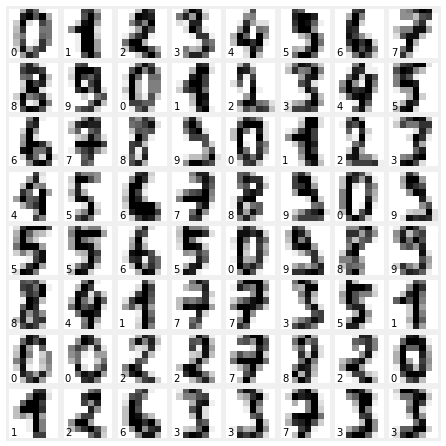

In [25]:
# eine Probe zeichnen
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

/tmp/ipykernel_27038/4284017808.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


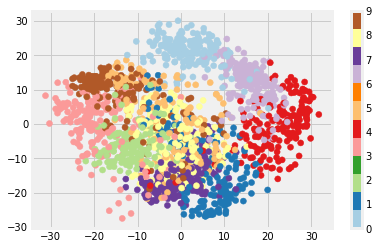

In [29]:
# die Verteilung der Werte im Datensatz zu visualisieren
plt.figure()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

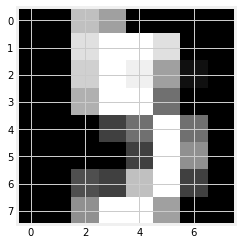

In [31]:
# stellen wir nun eine Ziffer aus dem Datensatz dar
plt.figure(figsize=(4,4))
plt.imshow(images[5].reshape(8,8), cmap='gray');

In [36]:
def normalize(X):
    """Normalisierung des gegebenen Datensatzes X
        
    Args:
        X: ndarray, Datensatz
    
    Returns:
        (Xbar, mean, std): Tupel von ndarray, Xbar ist der normalisierte Datensatz
        mit Mittelwert 0 und Standardabweichung 1; mean und std sind der
        Mittelwert bzw. die Standardabweichung.
    
    Note:
        Sie werden auf Dimensionen stoßen, bei denen die Standardabweichung
        Null ist, für die bei einer Normalisierung die normalisierten Daten
        NaN sein. Behandeln Sie dies, indem Sie `std = 1` für diese
        Dimensionen bei der Normalisierung.
    """
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = ((X-mu)/std_filled)
    return Xbar, mu, std

def eig(S):
    """Berechnen Sie die Eigenwerte und die entsprechenden Eigenvektoren für 
        die Kovarianzmatrix S.
        
    Args:
        S: nDarray, Kovarianzmatrix
    
    Returns:
        (eigvals, eigvecs): ndarray, die Eigenwerte und Eigenvektoren

    Note:
        Die Eigenwerte und Eigenvektoren sollten in absteigender
        Reihenfolge der Eigenwerte
    """
    eigvals, eigvecs = np.linalg.eig(S)
    k = np.argsort(eigvals)[::-1]
    return eigvals[k], eigvecs[:,k]

def projection_matrix(B):
    """Berechnen Sie die Projektionsmatrix auf den von "B" aufgespannten Raum
    
    Args:
        B: nDarray der Dimension (D, M), die Basis für den Unterraum
    
    Returns:
        P: die Projektionsmatrix
    """
    return (B @ np.linalg.inv(B.T @ B) @ B.T)

def PCA(X, num_components):
    """
    Args:
        X: nDarray der Größe (N, D), wobei D die Dimension der Daten ist,
            und N die Anzahl der Datenpunkte ist
       num_components: die Anzahl der zu verwendenden Hauptkomponenten.
    Returns:
        X_reconstruct: ndarray der Rekonstruktion
        von X aus den ersten `num_components` Hauptkomponenten.
    """
    # zunächst werden die Ziffern normalisiert, so dass sie einen Mittelwert 
    # von Null und eine Einheitsvarianz haben.
    
    # berechnen Sie dann die Kovarianzmatrix S der Daten
    S = 1.0/len(X) * np.dot(X.T, X)

    # als nächstes werden die Eigenwerte und die entsprechenden Eigenvektoren für S
    eig_vals, eig_vecs = eig(S)

    # Indizes für die größten Eigenwerte zu finden, sie zum Sortieren der Eigenwerte 
    # zu verwenden und entsprechende Eigenvektoren.
    eig_vals, eig_vecs = eig_vals[:num_components], eig_vecs[:, :num_components]

    # Dimensionalitätsreduktion der Originaldaten
    B = np.real(eig_vecs)
    
    # Z = X.T.dot(W)
    # die Bilder aus der niederdimensionalen Darstellung rekonstruieren
    reconst = (projection_matrix(B) @ X.T)
    return reconst.T

In [37]:
## Einige Vorverarbeitungen der Daten
NUM_DATAPOINTS = 1000
X = (images.reshape(-1, 8 * 8)[:NUM_DATAPOINTS]) / 255.
Xbar, mu, std = normalize(X)

In [38]:
for num_component in range(1, 20):
    from sklearn.decomposition import PCA as SKPCA
    # Wir können eine Standardlösung berechnen, die von der 
    # PCA-Implementierung von scikit-learn vorgegeben wird
    pca = SKPCA(n_components=num_component, svd_solver='full')
    sklearn_reconst = pca.inverse_transform(pca.fit_transform(Xbar))
    # Unser eigene PCA
    reconst = PCA(Xbar, num_component)
    np.testing.assert_almost_equal(reconst, sklearn_reconst)
    print(np.square(reconst - sklearn_reconst).sum())

1.785495308190812e-24
2.5188917860217492e-24
1.807977923466343e-24
1.8215173589163017e-24
2.472614880058604e-24
2.7486354216471514e-24
2.246325799377376e-24
1.9619092154525834e-24
2.0160754506859972e-24
3.551603663890549e-24
1.8232159045821367e-24
2.1426654574812744e-24
5.127343514601955e-23
1.4600304119684607e-24
2.4805561877601263e-24
4.563986649385044e-23
1.8608068531706224e-23
9.746519515538445e-24
3.179329560565787e-24


In [39]:
# Bewertung des Rekonstruktionsfehlers 
# unserer Implementierung
def mse(predict, actual):
    """Hilfsfunktion zur Berechnung des mittleren quadratischen Fehlers (MSE)"""
    return np.square(predict - actual).sum(axis=1).mean()

In [40]:
loss = []
reconstructions = []

# Iteration über verschiedene Anzahlen von Hauptkomponenten 
# und Berechnung des MSE
for num_component in range(1, 100):
    reconst = PCA(Xbar, num_component)
    error = mse(reconst, Xbar)
    reconstructions.append(reconst)
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std + mu # "unnormalize" the reconstructed image
loss = np.asarray(loss)

In [41]:
import pandas as pd
# Erstellen einer Tabelle mit der Anzahl der Hauptkomponenten 
# und dem MSE
pd.DataFrame(loss).head()

,0,1
0,1.0,53.608534
1,2.0,47.675988
2,3.0,42.595492
3,4.0,38.251548
4,5.0,35.029516


## Quantitative Bewertung

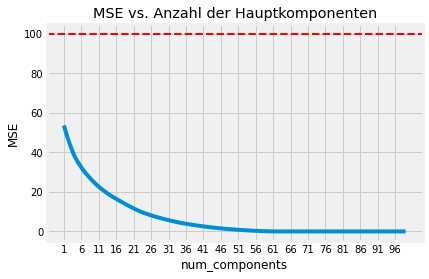

In [42]:
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1]);
ax.axhline(100, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(1, 100, 5));
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs. Anzahl der Hauptkomponenten');

## Qualitative Bewertung

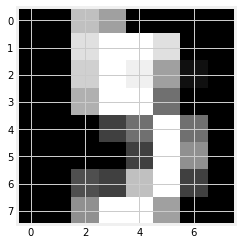

In [43]:
# Originalbild
plt.imshow(np.reshape(digits.images[5], [8, 8]), cmap='gray');

In [1]:
# SKLearn PCA 
plt.imshow(np.reshape(sklearn_reconst[5], [8, 8]), cmap='gray');

NameError: name 'plt' is not defined

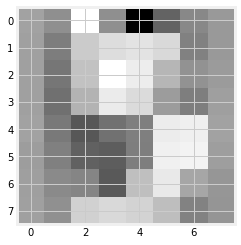

In [45]:
# Unsere PCA-Implementierung
plt.imshow(np.reshape(reconst[5], [8, 8]), cmap='gray');

## Anwendungsbeispiele

## Biomedizin

![](application1.jpg)

Quelle: https://www.nature.com/articles/ncomms12575

## Stromversorgungssysteme

![](anwendung2.png)

Quelle: https://www.mdpi.com/1996-1073/13/22/5896

## Massenspektrometrie in der Chemie

![](application3.png)

Quelle: https://pubs.acs.org/doi/10.1021/acs.macromol.2c02383

## Neurowissenschaft

![](application4.jpg)

Quelle: https://www.sciencedirect.com/science/article/pii/S0165027022002941

## Entwicklung von Arzneimitteln (Drug discovery)

![](application5.jpg)

Die X- und Y-Achsen der Abbildung entsprechen dem gesamten Genom-Expressionsprofil von zwei
unabhängigen Makrophagen-Zellpopulationen

Quelle: https://www.sciencedirect.com/science/article/abs/pii/S1359644617300181

## Bioinformatik

![](application6.jpg)

Quelle: https://www.frontiersin.org/journals/bioinformatics/articles/10.3389/fbinf.2022.821861/full

<style>
td {
  font-size: 15px
}
</style>

# Wichtige Punkte in der Praxis

|__PCA__|
|:-----|
| Kodierung/Dekodierung, keine Robustheit gegen Rauschen | 
| Koordinaten sind in absteigener Reihenfolge der Varianz geordnet |
| Robustheit gegenüber moderatem Rauschen mit bekannten Verteilungen | 
| einfacher Algorithmus (ohne Regularisierung), geringe Robustheit | 

<style>
td {
  font-size: 15px
}
</style>
# Wichtige Punkte in der Praxis

## Optimierungsprozess 

|__PCA__|
|:-----|
| Abbildung der Eingangsdaten auf einen festen Vektor|
| iterative Methoden: QR Zerlegung, Jacobi Algorithmus, Singulärwertzerlegung | 
| aufgrund der Kovarianz-Berechnung ineffizient bei großen Datenmengen | 
| basiert auf der Korrelations-/Kovarianz-Matrix, welche - zumindest in der Theorie - sehr empfindlich gegenüber Ausreißern sein kann | 

# Lieraturverzeichnis

[Deisenroth et al., 2020] Deisenroth, Marc Peter, A. Aldo Faisal, and Cheng Soon Ong. Mathematics for machine learning. Cambridge University Press, 2020.

[Goodfellow et al., 2016] Ian Goodfellow, Yoshua Bengio and Aaron Courville, Deep Learning, MIT Press, 2016.

[Friedman et al., 2017] Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie, The Elements of Statistical Learning: Data Mining, Inference, and Prediction, Springer, 2017.

[Plaut, 2018] Plaut, E., 2018. From principal subspaces to principal components with linear autoencoders. arXiv preprint arXiv:1804.10253.

[Im, Bengio et al., 2017] Im, D.I.J., Ahn, S., Memisevic, R. and Bengio, Y., 2017, February. Denoising criterion for variational auto-encoding framework. In Thirty-First AAAI Conference on Artificial Intelligence.

[Rolinek et al, 2019] Rolinek, M., Zietlow, D. and Martius, G., 2019. Variational Autoencoders Pursue PCA Directions (by Accident). In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (pp. 12406-12415).

[Lei et al., 2018] Lei, N., Luo, Z., Yau, S.T. and Gu, D.X., 2018. Geometric understanding of deep learning. arXiv preprint arXiv:1805.10451.

[Kingma et al., 2013] Kingma, D.P. and Welling, M., 2013. Auto-encoding variational bayes. arXiv preprint arXiv:1312.6114.

# Mehr details über PCA (aka Karhunen - Loeve Transform)

* __Unüberwachtes__ Lernen
* __Lineare Transformation__
![](pca-intuition.png)
* __"Transformiere"__ eine Menge von Beobachtungen in ein __anderes Koordinatensystem__, in dem die Werte der ersten Koordinate (Komponente) die __größtmögliche Varianz__ aufweisen [Friedman et al., 2017]
* Die __resultierenden Koordinaten (Komponenten)__ sind __nicht__ mit den ursprünglichen Koordinaten __korreliert__    

## Verbesserter PCA Algorithmus für hochdimensionale Datensätze

Manchmal kann die Dimensionalität unseres Datensatzes größer sein als die Anzahl der Stichproben, die wir haben. Dann könnte es ineffizient sein, PCA mit unserer obigen Implementierung durchzuführen. Stattdessen, können wir die PCA auf eine effizientere Weise implementieren, die wir "PCA für hochdimensionale Daten" (PCA_high_dim) nennen.

Nachfolgend sind die Schritte zur Durchführung von PCA für hochdimensionale Datensätze aufgeführt
1. Berechnen Sie die Matrix $\boldsymbol X\boldsymbol X^T$ (eine $N$ mal $N$ Matrix mit $N \ll D$)
2. Berechnen Sie Eigenwerte $\lambda$s und Eigenvektoren $V$ für $\boldsymbol X\boldsymbol X^T$
3) Berechnen Sie die Eigenvektoren der ursprünglichen Kovarianzmatrix als $\boldsymbol X^T\boldsymbol V$. Wählen Sie die Eigenvektoren, die mit den M größten Eigenwerten assoziiert sind, als Basis für den Hauptunterraum $U$.
4) Berechnen Sie die orthogonale Projektion der Daten auf den Unterraum, der von den Spalten von $\boldsymbol U$ aufgespannt wird.

In [ ]:
### PCA für hochdimensionale Datensätze

def PCA_high_dim(X, n_components):
    """Berechnen Sie PCA für kleine Stichprobengrößen, aber hochdimensionale Merkmale. 
    Args:
        X: nDarray der Größe (N, D), wobei D die Dimension der Stichprobe ist,
            und N die Anzahl der Stichproben ist
        num_components: die Anzahl der zu verwendenden Hauptkomponenten.
    Returns:
        X_reconstruct: (N, D) ndarray. die Rekonstruktion
            von X aus den ersten `num_components`-Prinzipalkomponenten.
    """
    N, D = X.shape
    M = np.dot(X, X.T) / N
    eig_vals, eig_vecs = eig(M)
    eig_vals, eig_vecs = eig_vals[:n_components], eig_vecs[:, :n_components]
    U = (X.T @ (eig_vecs))
    reconstruction = np.zeros((N, D))
    reconstruction = ((U @ np.linalg.inv(U.T @ U) @ U.T) @ X.T).T
    return reconstruction

In [ ]:
# Wir können eine Standardlösung berechnen, die von der 
    # PCA-Implementierung von scikit-learn vorgegeben wird
pca = SKPCA(n_components=60, svd_solver='full')
sklearn_reconst = pca.inverse_transform(pca.fit_transform(Xbar))
reconst = PCA_high_dim(Xbar, 60)

In [ ]:
plt.imshow(np.reshape(sklearn_reconst[5], [8, 8]), cmap='gray');

In [ ]:
plt.imshow(np.reshape(reconst[5].real, [8, 8]), cmap='gray');

## Neuronale Alternativen zur PCA: der Autoencoder

Für jeden Eingangsvektor $x$ der Dimension $d$ des kompletten Datensaztes der Länge $n$ generiert das neuronale Netz eine Rekonstruktion $x'$ durch:

* __Kodierung der Eingangsdaten__ (d.h. verwende die lineare / nicht-lineare Transformation $g_\phi(.)$)
* dies liefert eine __komprimierte Kodierung__ in der dünnsten Netzwerk-Ebene, $z$
* __Dekodierung der komprimierten Eingangsdaten__ durch Anwendung der linearen / nicht-linearen Transformation $f_\theta(.)$

![](autoencoder.png)

Die __Parameter $(\theta, \phi)$ werden im Verlauf des Training derart optimiert__, dass ein den Eingangsdaten möglichst ähnliches Ergebnis , $x \approx f_\theta(g_\phi(x))$, produziert wird. In anderen Worten: __die Indentitäts-Funktion wird erlernt__ mit __Cross-Entropy (bei sigmoid Aktivierungsfuntionen)__, __mittlere quadratische Fehler (MSE)__ etc.:

![](autoencoder.png)

# Denoising Variational Autoencoders (DVAE)

Das Funktionsprinzip __unterscheidet sich__ vom grundlegenden Autoencoder dahingehend, dass ein gewisses Maß an __Störrauschen__  (einer __gewissen Wahrscheinlichkeitsverteilung__ folgend) den __Eingangsdaten hinzugefügt wird__ und dass die __verborgenen Ebenen__ dieses Rauschen __ausgleichen muss__ um die Eingangsdaten zu __rekonstruieren__ [Im, Bengio et al., 2017, Kingma et al., 2017].
![](denoising-variational-autoencoder.png)

Für jeden gestörten Eingangsvektor $\tilde x$ eines originalen Vektors $x$ der Dimension $d$, generiert das neuronale Netz eine Rekonstruktion $x'$ durch:
* __Kodierung der Eingangsdaten__, welche die Abbildung als Wahrscheinlichkeit der Schätzung von $z$ unter Verwendung der Eingangsdaten darstellt
* dies liefert eine __komprimierte Kodierung in der dünnsten Netzwerk-Ebene__ $z$, welche der Verteilung $q_\phi(z|x)$ folgt
* __Dekodierung der komprimierten Eingangsdaten__ an der Ausgangsebene unter Einhaltung des __Beobachtungs-Modells__ $p_\theta(x|z)$

![](denoising-variational-autoencoder.png)

In [ ]:
# Implement the DVAE
# encoder part
x_noise = Input(shape=(28,28,1))
conv_1 = Conv2D(64,(3, 3), padding='valid',activation='relu')(x_noise)
conv_2 = Conv2D(64,(3, 3), padding='valid',activation='relu')(conv_1)
pool_1 = MaxPooling2D((2, 2))(conv_2)
conv_3 = Conv2D(32,(3, 3), padding='valid',activation='relu')(pool_1)
pool_2 = MaxPooling2D((2, 2))(conv_3)
h=Flatten()(pool_2)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

In [ ]:
# Implement the DVAE
# reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

In [ ]:
# Implement the DVAE
# decoder part
# we instantiate these layers separately so as to reuse them later
z=Reshape([1,1,latent_dim])(z)
conv_0T = Conv2DTranspose(128,(1, 1), padding='valid',activation='relu')(z)#1*1
conv_1T = Conv2DTranspose(64,(3, 3), padding='valid',activation='relu')(conv_0T)#3*3
conv_2T = Conv2DTranspose(64,(3, 3), padding='valid',activation='relu')(conv_1T)#5*5
conv_3T = Conv2DTranspose(48,(3, 3), strides=(2, 2),padding='same',activation='relu')(conv_2T)#10*10
conv_4T = Conv2DTranspose(48,(3, 3), padding='valid',activation='relu')(conv_3T)#12*12
conv_5T = Conv2DTranspose(32,(3, 3), strides=(2, 2),padding='same',activation='relu')(conv_4T)#24*24
conv_6T = Conv2DTranspose(16,(3, 3), padding='valid',activation='relu')(conv_5T)#26*26
x_out = Conv2DTranspose(1,(3, 3), padding='valid',activation='sigmoid')(conv_6T)#28*28

## DVAE

* DVAE __Verlustfunktion__ beinhaltet die Erstellung von Beispielen aus $z \backsim q_\phi(z|x)$. Dies ist ein __stochastischer Prozess__ und eignet sich daher __nicht zur Fehlerrückführung__.


* Die __geschätzte Posteriori-Verteilung $q_\phi(z|x)$__ approximiert die tatsächliche Verteilung $p_\theta(z|x)$. 


* Wir können die __Kullback-Leibler Abweichung__, $D_{KL}$  benutzen um die __Differenz der beiden Verteilungen__ zu quantifizieren. 

In [ ]:
# Implement the DVAE
# reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,
                              stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

## DVAE

Durch __Minimierung des Verlusts__, __maximieren__ wir daher die __untere Schranke der Wahrscheinlichkeit__ (__evidence lower bound (ELBO)__) zur Generierung echter Daten-Beispiele.

In [ ]:
# Implement the DVAE
# instantiate model
dvae = Model(x_noise, x_out)
dvae.summary()

# Compute loss
def DVAE_loss(x_origin,x_out):
    x_origin=K.flatten(x_origin)
    x_out=K.flatten(x_out)
    xent_loss = original_dim * metrics.binary_crossentropy(x_origin, x_out)
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    dvae_loss = K.mean(xent_loss + kl_loss)
    return dvae_loss

# compile the model
dvae.compile(optimizer='adam', loss=DVAE_loss)

![](network-layout.png)

In [ ]:
# Train the DVAE
dvae.fit(noise_train,x_train,  shuffle=True, epochs=epochs, batch_size=batch_size, validation_data=(noise_test, x_test))

# Comparison PCA vs. DVAE
# testing the DVAE
num_test=10000
showidx=np.random.randint(0,num_test,n_images)
x_out=dvae.predict(x_test[showidx])

# prepare data for testing PCA
pcaInputTest = np.reshape(x_test,[shape_x_test[0],shape_x_test[1]*shape_x_test[2]]).astype('float32')/255
pcaOutput = analytical_pca(pcaInputTest)

![](training-progress.png)

In [ ]:
# Display results
digit_size = 28
figure = np.zeros((digit_size * 4, digit_size * n_images))
for i,idx in enumerate (showidx):
    figure[0: 28,i *28: (i + 1) * 28] = np.reshape(x_test[idx], [28, 28]) # input data
    figure[28: 28 * 2,i *28: (i + 1) * 28] = np.reshape(noise_test[idx], [28, 28]) # noisy input data 
    figure[28 * 2: 28 * 3,i *28: (i + 1) * 28] = np.reshape(x_out[i], [28, 28]) # DVAE output
    figure[28 * 3: 28 * 4,i *28: (i + 1) * 28] = np.reshape(pcaOutput[idx], [28, 28]) # PCA output
plt.figure(figsize=(28 * 4, 28*n_images))
plt.imshow(figure, cmap='Greys_r')
# plt.savefig('inference_output.png')
plt.show()

In [ ]:
%%HTML 
<style>
td {
  font-size: 15px
}
</style>

# Vergleich von PCA und DVAE

### Inferenz

![](inference_output.png)

# PCA vs. Autoencoders
## "Zwei identische Fremde"

# PCA vs. Autoencoders

*  Ein __Autoencoder__ mit einer einzelnen __voll verbundenen (fully-connected) versteckten Ebene__, einer __linearen Aktivierungsfunktion__ und dem __quadratischen Fehler als Kostenfunktion__ ist __eng mit der PCA verwandt__ - seine __Gewichten__ spannen den __Untervektorraum der Hauptkomponenten__ auf [Plaut, 2018]


* Bei __Autoencodern__ sorgt die __diagonale Approximation beim Kodiervorgang__ zusammen mit der __inhärenten Stochastizität__ für lokale __Orthogonalität beim Dekodieren__  [Rolinek et al, 2019]


<style>
td {
  font-size: 15px
}
</style>

# Vergleich von PCA und DVAE

### Lernen der Mannigfaltigkeit

|__PCA__|__DVAE__|
|:-----|:---|
| Kodierung/Dekodierung, keine Robustheit gegen Rauschen | nicht-linear, probabilistische Kodierung/Dekodierung mit Robustheit gegen Rauschen und nicht-linearen Aktivierungsfunktionen|
| unkorrelierte Koordinaten | korrelierte Ausgansdaten an der dünnsten Netzwerkebene |
| Koordinaten sind in absteigener Reihenfolge der Varianz geordnet | Koordinaten sind ungeordnet |
| die Spalten der Transformations-Matrix sind orthonormal | die Spalten der Transformations-Matrix sind nicht notwendigerweise orthonormal |
| Robustheit gegenüber moderatem Rauschen mit bekannten Verteilungen | Robustheit gegen eine Vielzahl verschiedener Arten und Größenordnungen an injeziertem Rauschen (masking noise, Gaussian noise, salt-and-pepper noise), da das Entrauschen entscheidung für die Generalisierung ist |
| einfacher Algorithmus (ohne Regularisierung), geringe Robustheit | die Punkte in niedrig-dimensionalen Mannifaltigkeiten sind robust gegen Rauschen im hoch-dimensionalen Beobachtungs-Raum |

<style>
td {
  font-size: 15px
}
</style>
# Vergleich zwischen PCA und DVAE

### Training 

|__PCA__|__DVAE__|
|:-----|:---|
| Abbildung der Eingangsdaten auf einen festen Vektor | Abbildung der Eingangsdaten auf eine Wahrscheinlichkeitsverteilung |
| iterative Methoden: QR Zerlegung, Jacobi Algorithmus, Singulärwertzerlegung | Fehlerrückführung (Backpropagation)  |
| aufgrund der Kovarianz-Berechnung ineffizient bei großen Datenmengen | effizient bei großen Datenmengen aufgrund der starken Fähigkeit des Erlernens der Mannigfaltigkeit |
| basiert auf der Korrelations-/Kovarianz-Matrix, welche - zumindest in der Theorie - sehr empfindlich gegenüber Ausreißern sein kann | kann Beispiele direkt aus dem Eingangsraum generieren und daher die Eigenschfaten des Eingangsrauschens beschreiben ("reparametrization trick") |